<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I created a Dense Network (ANN) with only one hidden layer having three neurons using keras. Purpose of this notebook is to see how things work.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [14]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [17]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

In [23]:
model.add(Dense(3, activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [35]:
history = model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4338
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4317
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4300
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4287
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4275
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4253
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4242
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4232
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4222


In [36]:
model.layers[0].get_weights()

[array([[-0.31772774, -0.20697041,  0.05739075],
        [ 0.7435277 , -1.8731632 , -2.1198304 ],
        [-0.16952948,  0.28617388, -0.0707567 ],
        [ 0.7468529 , -0.2622394 , -0.06146158],
        [ 0.43975243,  0.10137417,  0.33340323],
        [-0.18451425, -0.01177636, -0.04196144],
        [-1.204775  ,  0.3396978 ,  0.6677841 ],
        [ 0.36588383,  0.18227857,  0.03930915],
        [ 1.2777337 , -0.47390768, -0.30295023],
        [-0.02455438, -0.5151802 ,  0.06860539],
        [-0.57560045,  0.00478352,  0.5105431 ]], dtype=float32),
 array([-0.6793668 , -0.11183098,  0.78806984], dtype=float32)]

In [37]:
model.layers[1].get_weights()

[array([[ 1.0261142],
        [-0.5159464],
        [-1.8757414]], dtype=float32),
 array([-0.6174425], dtype=float32)]

In [38]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [39]:
y_pred = np.where(y_log>0.5,1,0)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8165

### **How can we increase accuracy of neural networks?**

1. Increase number of epochs
2. Generally ReLu give better results when used in hidden layer
3. Increase number of node in hidden layers
4. Increase number of hidden layers

In [41]:
import matplotlib.pyplot as plt

In [42]:
history.history

{'loss': [0.4338301420211792,
  0.43167024850845337,
  0.4300410747528076,
  0.4286886155605316,
  0.427496075630188,
  0.4263703525066376,
  0.4252885580062866,
  0.4242178797721863,
  0.42318296432495117,
  0.4221827983856201]}

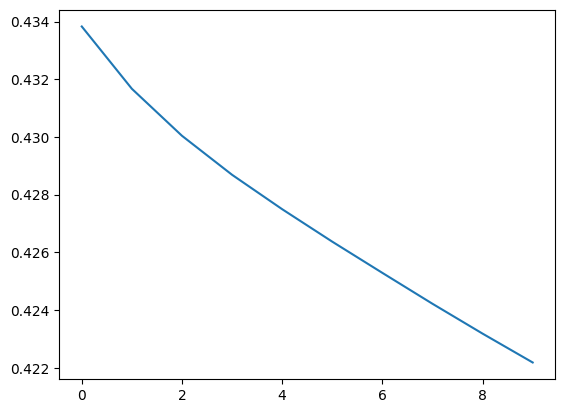

In [43]:
plt.plot(history.history['loss'])